In [1]:
!pip install pygbif pandas geopandas folium

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for pygbif from https://files.pythonhosted.org/packages/bd/9e/fdc9caffc44c13b83e61b494b057e83d1486a741618c548780cbe1b9f541/pygbif-0.6.5-py3-none-any.whl.metadata
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/be/82/79e02a0e5dd4aca81894842b9d6522624a40048a913c6384efb2987a4144/geopandas-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b5/a8/5f764f333204db0390362a4356d03a43626997f26818a0e9396f1b3bd8c9/folium-0.20.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests-cache from https://files.pythonhosted.org/packages/4e/2e/8f4051119f460cfc786aa91f212165bb6e643283b533db572d7b33952bd2/requests_cache-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for geojson_rewind from https://

In [2]:
from pygbif import species, occurrences
import pandas as pd
import folium

# Lista de especies
species_list = [
    "Gallotia",
    "Fringilla polatzeki",
    "Fringilla teydea",
    "Columba bollii",
    "Plecotus teneriffae",
    "Crocidura canariensis"
]

# Obtener usageKey de cada especie
taxon_keys = {}
for name in species_list:
    res = species.name_backbone(name=name)
    if "usageKey" in res:
        taxon_keys[name] = res["usageKey"]

# Descargar datos de ocurrencia con coordenadas
all_occurrences = []
for name, key in taxon_keys.items():
    data = occurrences.search(taxonKey=key, hasCoordinate=True, limit=200)
    for record in data['results']:
        if 'decimalLatitude' in record and 'decimalLongitude' in record:
            all_occurrences.append({
                'species': name,
                'latitude': record['decimalLatitude'],
                'longitude': record['decimalLongitude'],
                'country': record.get('country', 'NA'),
                'date': record.get('eventDate', 'NA')
            })

# Crear DataFrame
df_all = pd.DataFrame(all_occurrences)

# Visualizar en un mapa
m = folium.Map(location=[28.3, -16.5], zoom_start=7)

for _, row in df_all.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        popup=f"{row['species']} ({row['date']})",
        color='green',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

m


In [3]:
# Guardar el DataFrame en un archivo CSV
df_all.to_csv("especies_canarias.csv", index=False)
print("✅ Archivo guardado como especies_canarias.csv")

✅ Archivo guardado como especies_canarias.csv


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
df = pd.read_csv("especies_canarias.csv")

# Codificar la especie como número
df['species_code'] = df['species'].astype('category').cat.codes

# Variables de entrada (latitud y longitud) y objetivo (especie)
X = df[['latitude', 'longitude']]
y = df['species_code']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluar
y_pred = clf.predict(X_test)

print("📊 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n📈 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=df['species'].astype('category').cat.categories))


📊 Matriz de confusión:
[[46  0  0  1  5  0]
 [ 0  6  0  0  5  0]
 [ 0  0 66  0  3  0]
 [ 1  0  0 56  7  2]
 [ 5  0  2  4 41  0]
 [ 0  0  0  0  1 19]]

📈 Reporte de clasificación:
                       precision    recall  f1-score   support

       Columba bollii       0.88      0.88      0.88        52
Crocidura canariensis       1.00      0.55      0.71        11
  Fringilla polatzeki       0.97      0.96      0.96        69
     Fringilla teydea       0.92      0.85      0.88        66
             Gallotia       0.66      0.79      0.72        52
  Plecotus teneriffae       0.90      0.95      0.93        20

             accuracy                           0.87       270
            macro avg       0.89      0.83      0.85       270
         weighted avg       0.88      0.87      0.87       270



In [5]:
!pip install earthengine-api geemap

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for earthengine-api from https://files.pythonhosted.org/packages/96/8e/d75e869c03663d4983aa338295e21aedb86e77d9b061d950d688d49666c7/earthengine_api-1.5.21-py3-none-any.whl.metadata
  Obtaining dependency information for geemap from https://files.pythonhosted.org/packages/46/97/c9bbd9327c803f4211aa0e34b0401d10add163d1b7cb12548bcb56a731af/geemap-0.35.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for google-cloud-storage from https://files.pythonhosted.org/packages/89/4f/b922e919f6e1ea5905f1427fadf1a3f56a85e79e2b0037fec182f6b437dd/google_cloud_storage-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for google-api-python-client>=1.12.1 from https://files.pythonhosted.org/packages/16/2d/4250b81e8f5309b58650660f403584db6f64067acac74475893a8f33348d/google_api_python_client-2.174.0-py3-none-any.whl.metad

In [6]:
import ee
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AVMBsJgCuE3D1O-NibXifn3zaVHc1jfC19p8fL2UrjpKDC6NFBeYd4ZIQgY



Successfully saved authorization token.


In [7]:
import ee
import pandas as pd

# Inicializar Earth Engine
ee.Initialize()

# Cargar tus coordenadas desde CSV (asegúrate de que tiene columnas: latitude, longitude)
df = pd.read_csv("especies_canarias.csv")

# Crear lista de puntos
features = [ee.Feature(ee.Geometry.Point([lon, lat])) for lon, lat in zip(df.longitude, df.latitude)]
fc = ee.FeatureCollection(features)

# Imagen de elevación (90m resolución)
elevation = ee.Image("CGIAR/SRTM90_V4")

# Extraer elevación para cada punto
elev_data = elevation.reduceRegions(
    collection=fc,
    reducer=ee.Reducer.mean(),
    scale=90
).getInfo()

# Añadir al DataFrame
df["elevation"] = [f["properties"]["mean"] if "mean" in f["properties"] else None for f in elev_data["features"]]

# Guardar nuevo archivo
df.to_csv("especies_canarias_enriquecidas.csv", index=False)
print("✅ Archivo enriquecido guardado.")

✅ Archivo enriquecido guardado.


In [9]:
import ee
import pandas as pd
from datetime import datetime

# Inicializar Earth Engine (debes haber autenticado antes)
ee.Initialize()

# Cargar CSV o usar DataFrame anterior
df = pd.read_csv("especies_canarias.csv")  # Asegúrate que tenga 'latitude' y 'longitude'

# Crear EE FeatureCollection con puntos
features = [
    ee.Feature(ee.Geometry.Point([lon, lat]), {"id": i})
    for i, (lat, lon) in enumerate(zip(df.latitude, df.longitude))
]
fc = ee.FeatureCollection(features)

# ELEVACIÓN
elevation_img = ee.Image("CGIAR/SRTM90_V4")
elev_result = elevation_img.reduceRegions(collection=fc, reducer=ee.Reducer.mean(), scale=90)

# NDVI (último dato disponible de MODIS)
ndvi_img = ee.ImageCollection("MODIS/061/MOD13Q1")\
    .filterDate("2023-12-01", "2024-01-01")\
    .select("NDVI")\
    .first()
ndvi_result = ndvi_img.reduceRegions(collection=fc, reducer=ee.Reducer.mean(), scale=250)

# TEMPERATURA (media mensual reciente)
temp_img = ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE")\
    .filterDate("2023-12-01", "2024-01-01")\
    .select("tmmx")\
    .first().divide(10)  # Divide para convertir a °C
temp_result = temp_img.reduceRegions(collection=fc, reducer=ee.Reducer.mean(), scale=4000)

# Combinar resultados
elev_values = elev_result.getInfo()["features"]
ndvi_values = ndvi_result.getInfo()["features"]
temp_values = temp_result.getInfo()["features"]

# Añadir al DataFrame
df["elevation"] = [f["properties"].get("mean") for f in elev_values]
df["NDVI"] = [f["properties"].get("mean") for f in ndvi_values]
df["temperature_C"] = [f["properties"].get("mean") for f in temp_values]

# Guardar enriquecido
df.to_csv("especies_canarias_enriquecido.csv", index=False)
print("✅ Archivo enriquecido con variables ambientales guardado.")


✅ Archivo enriquecido con variables ambientales guardado.


In [10]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/cc/f5/1b5d88e5a65168b435e8339b53d027e3e7adecb0c7d157bc86d18f78471b/xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/6e/89/f7a07dc961b60645dbbf42e80f2bc85ade7feb9a491b11a1e973aa00071f/nvidia_nccl_cu12-2.27.5-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.7 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 MB 2.9 MB/s eta 0:00:00 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar CSV enriquecido
df = pd.read_csv("especies_canarias_enriquecidas.csv")  # reemplaza con tu archivo

# 2. Variables predictoras (ajusta a tus columnas)
X = df[['elevation', 'latitude', 'longitude' ]]
y = df['species']  # columna con nombres científicos

# 3. Codificar nombres de especies a números
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Crear y entrenar modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 6. Predecir
y_pred = model.predict(X_test)

# 7. Evaluar
print("📊 Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("📉 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


/home/106b3412-9e44-4b27-9157-edd0375f41df/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:01:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Clasificación:
                       precision    recall  f1-score   support

       Columba bollii       0.86      0.91      0.89        34
Crocidura canariensis       1.00      0.33      0.50         6
  Fringilla polatzeki       1.00      0.92      0.96        49
     Fringilla teydea       0.86      0.95      0.90        39
             Gallotia       0.74      0.74      0.74        38
  Plecotus teneriffae       0.88      1.00      0.93        14

             accuracy                           0.87       180
            macro avg       0.89      0.81      0.82       180
         weighted avg       0.88      0.87      0.87       180

📉 Matriz de confusión:
[[31  0  0  1  2  0]
 [ 0  2  0  0  4  0]
 [ 0  0 45  0  4  0]
 [ 1  0  0 37  0  1]
 [ 4  0  0  5 28  1]
 [ 0  0  0  0  0 14]]


In [4]:
import pandas as pd

df = pd.read_csv("especies_canarias_enriquecidas.csv")
print(df.columns)

Index(['species', 'latitude', 'longitude', 'country', 'date', 'elevation'], dtype='object')


In [8]:
print(df.columns)

Index(['species', 'latitude', 'longitude', 'country', 'date', 'elevation'], dtype='object')


In [9]:
pip install earthengine-api geemap geopandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
!earthengine authenticate --quiet

/bin/bash: earthengine: command not found


In [3]:
!pip install earthengine-api
!earthengine authenticate --quiet

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
/bin/bash: earthengine: command not found


In [5]:
import ee
import pandas as pd

# Inicializar Earth Engine
ee.Initialize()

# Cargar CSV con especies y coordenadas
df = pd.read_csv("especies_canarias_enriquecidas.csv")

# Crear FeatureCollection desde lat/lon
features = [
    ee.Feature(ee.Geometry.Point([lon, lat]), {"id": i})
    for i, (lat, lon) in enumerate(zip(df['latitude'], df['longitude']))
]
fc = ee.FeatureCollection(features)

# ---------- CAPAS ----------

# WORLDCLIM - Imagen única
bio = ee.Image("WORLDCLIM/V1/BIO")

# Temperatura media anual (bio01), está en décimas de °C
temp = bio.select("bio01").divide(10)

# Precipitación anual (bio12)
prec = bio.select("bio12")

# MODIS NDVI promedio 2020
ndvi = (
    ee.ImageCollection("MODIS/061/MOD13Q1")  # Actualizada versión 061
    .filterDate("2020-01-01", "2020-12-31")
    .select("NDVI")
    .mean()
    .multiply(0.0001)
)

# ---------- EXTRAER DATOS ----------

temp_vals = temp.reduceRegions(collection=fc, reducer=ee.Reducer.first(), scale=1000).getInfo()
prec_vals = prec.reduceRegions(collection=fc, reducer=ee.Reducer.first(), scale=1000).getInfo()
ndvi_vals = ndvi.reduceRegions(collection=fc, reducer=ee.Reducer.first(), scale=250).getInfo()

# ---------- AGREGAR AL DATAFRAME ----------

df['temperature'] = [f['properties'].get('first') for f in temp_vals['features']]
df['precipitation'] = [f['properties'].get('first') for f in prec_vals['features']]
df['NDVI'] = [f['properties'].get('first') for f in ndvi_vals['features']]

# ---------- GUARDAR ----------

df.to_csv("especies_canarias_enriquecidas_con_clima.csv", index=False)
print("Archivo enriquecido guardado con éxito.")


Archivo enriquecido guardado con éxito.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import joblib

# 1. Cargar el CSV enriquecido
df = pd.read_csv("especies_canarias_enriquecidas_con_clima.csv")

# 2. Variables predictoras y objetivo
X = df[['temperature', 'precipitation', 'NDVI', 'elevation']]
y = df['species']  # nombres científicos

# 3. Codificar etiquetas (especies)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 6. Evaluar el modelo
y_pred = model.predict(X_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 7. Guardar el modelo y el codificador
joblib.dump(model, "modelo_xgboost_especies.pkl")
joblib.dump(le, "label_encoder.pkl")

/home/106b3412-9e44-4b27-9157-edd0375f41df/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:19:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Matriz de confusión:
[[30  0  0  3  1  0]
 [ 0  3  0  0  2  1]
 [ 0  1 46  0  2  0]
 [ 2  0  0 28  4  5]
 [ 4  0  0  5 27  2]
 [ 0  0  0  3  2  9]]

Reporte de clasificación:
                       precision    recall  f1-score   support

       Columba bollii       0.83      0.88      0.86        34
Crocidura canariensis       0.75      0.50      0.60         6
  Fringilla polatzeki       1.00      0.94      0.97        49
     Fringilla teydea       0.72      0.72      0.72        39
             Gallotia       0.71      0.71      0.71        38
  Plecotus teneriffae       0.53      0.64      0.58        14

             accuracy                           0.79       180
            macro avg       0.76      0.73      0.74       180
         weighted avg       0.80      0.79      0.80       180



['label_encoder.pkl']

In [8]:
import ee
import pandas as pd

ee.Initialize()

# Coordenadas de prueba
new_coords = [
    {"lat": 28.3, "lon": -16.5, "location": "Parque Nacional del Teide"},
    {"lat": 28.7, "lon": -17.9, "location": "La Palma"},
    {"lat": 27.8, "lon": -15.5, "location": "Gran Canaria"}
]

features = [
    ee.Feature(ee.Geometry.Point(coord["lon"], coord["lat"]), {"location": coord["location"]})
    for coord in new_coords
]
fc = ee.FeatureCollection(features)

# Usamos la imagen completa de WORLDCLIM y seleccionamos las bandas
worldclim = ee.Image("WORLDCLIM/V1/BIO")
temp = worldclim.select("bio01").divide(10)  # Temperatura anual media en °C
prec = worldclim.select("bio12")  # Precipitación anual total

# NDVI anual promedio (MODIS)
ndvi = ee.ImageCollection("MODIS/006/MOD13Q1").filterDate("2020-01-01", "2020-12-31").select("NDVI").mean().multiply(0.0001)

# Reducir a puntos
temp_val = temp.reduceRegions(fc, ee.Reducer.first(), scale=1000).getInfo()
prec_val = prec.reduceRegions(fc, ee.Reducer.first(), scale=1000).getInfo()
ndvi_val = ndvi.reduceRegions(fc, ee.Reducer.first(), scale=250).getInfo()

# Armar DataFrame
results = []
for t, p, n in zip(temp_val["features"], prec_val["features"], ndvi_val["features"]):
    props = t["properties"]
    props["temperature"] = props.pop("first")
    props["precipitation"] = p["properties"]["first"]
    props["NDVI"] = n["properties"]["first"]
    results.append(props)

df_predict = pd.DataFrame(results)
display(df_predict)


,location,temperature,precipitation,NDVI
0,Parque Nacional del Teide,10.1,485,0.282700
1,La Palma,15.8,454,0.463235
2,Gran Canaria,20.6,148,0.118722


In [11]:
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=50,  # antes era 100 por defecto
    max_depth=3       # menos complejidad
)

In [12]:
import joblib

# Cargar el codificador desde el archivo .pkl
label_encoder = joblib.load("label_encoder.pkl")

# Opcional: Ver las clases
print(label_encoder.classes_)

['Columba bollii' 'Crocidura canariensis' 'Fringilla polatzeki'
 'Fringilla teydea' 'Gallotia' 'Plecotus teneriffae']


In [15]:
nueva_muestra = {
    "temperature": 17.5,      # °C promedio anual
    "precipitation": 600.0,   # mm anuales
    "NDVI": 0.42,             # índice de vegetación
    "elevation": 850.0        # metros sobre el nivel del mar
}

In [16]:
import pandas as pd
import joblib

# 1. Cargar modelo y codificador
modelo = joblib.load("modelo_xgboost_especies.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# 2. Crear un DataFrame con la nueva muestra
nueva_muestra_df = pd.DataFrame([nueva_muestra])

# 3. Predecir
prediccion_codificada = modelo.predict(nueva_muestra_df)[0]

# 4. Decodificar resultado
especie_predicha = label_encoder.inverse_transform([prediccion_codificada])[0]

print("🔍 Especie predicha:", especie_predicha)


🔍 Especie predicha: Plecotus teneriffae


In [20]:
import pandas as pd
import folium
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from joblib import load

# 1. Cargar y limpiar el dataset
df = pd.read_csv("especies_canarias_enriquecidas_con_clima.csv").dropna().reset_index(drop=True)

# 2. Definir variables predictoras y objetivo
X = df[['temperature', 'precipitation', 'NDVI', 'elevation']]
y = df['species']

# 3. Codificar especies
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Dividir el dataset en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Extraer subconjunto de df con índices correctos
df_test = df.iloc[X_test.index].copy()

# 6. Cargar modelo y predecir
model = load("modelo_xgboost_especies.pkl")
df_test['predicted_species'] = le.inverse_transform(model.predict(X_test))

# 7. Crear mapa interactivo
mapa = folium.Map(location=[28.5, -15.5], zoom_start=7)
for _, row in df_test.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Especie predicha: {row['predicted_species']}",
        icon=folium.Icon(color="green", icon="leaf")
    ).add_to(mapa)

# 8. Guardar mapa en HTML
mapa.save("mapa_predicciones.html")


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV (ajusta el nombre si es diferente)
df = pd.read_csv("especies_canarias_enriquecidas_con_clima.csv")

# Seleccionar solo columnas relevantes
df = df[['temperature', 'precipitation', 'NDVI']].dropna()

# Variables predictoras y objetivo
X = df[['temperature', 'precipitation']]
y = df['NDVI']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 0.007149872257886181
R²: 0.8508928092966958


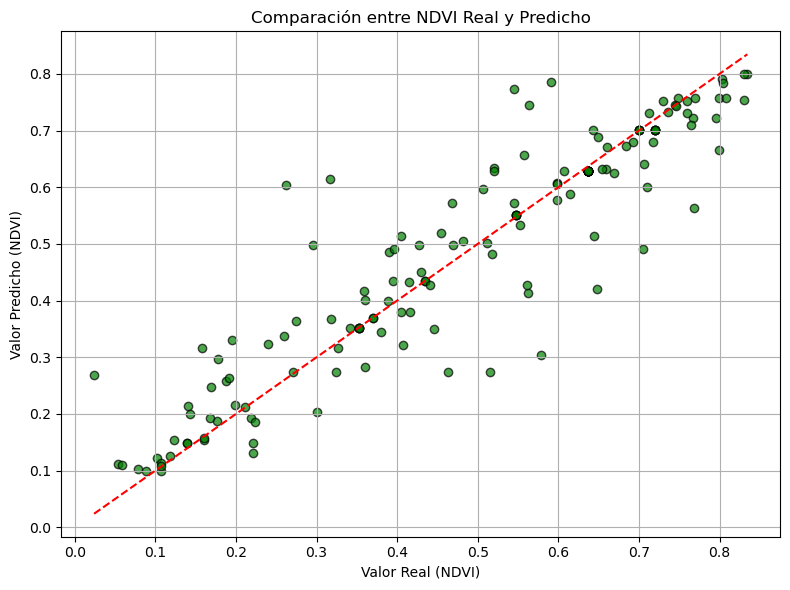

In [26]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Valor Real (NDVI)")
plt.ylabel("Valor Predicho (NDVI)")
plt.title("Comparación entre NDVI Real y Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
import joblib

# Guardar el modelo
joblib.dump(model, "modelo_random_forest_ndvi.pkl")

# Luego puedes cargarlo así:
# modelo_cargado = joblib.load("modelo_random_forest_ndvi.pkl")


['modelo_random_forest_ndvi.pkl']

In [33]:
pip install streamlit streamlit-folium matplotlib seaborn joblib folium


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/84/3b/35400175788cdd6a43c90dce1e7f567eb6843a3ba0612508c0f19ee31f5f/streamlit-1.46.1-py3-none-any.whl.metadata
  Obtaining dependency information for streamlit-folium from https://files.pythonhosted.org/packages/57/1d/4fb456ca29b58b4272672bbd80769ba114b21ccf39af2bf0531895f559bc/streamlit_folium-0.25.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.5.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/1d/9a/4114a9057db2f1462d5c8f8390ab7383925fe1ac012eaa42402ad65c2963/GitPython-3.1.44-py3-none-any.whl.metadata
  Obtaining dependency infor